<a href="https://colab.research.google.com/github/likhith005/Generative-AI/blob/master/Raj_Lab7GANs_on_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, Conv2DTranspose, BatchNormalization, LeakyReLU, Reshape
import tensorflow as tf

# Load the training data
train_data = pd.read_csv('/content/fashion-mnist_train.csv')
train_data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = train_data.drop('label',axis=1)
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,5,0,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,2,0,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train=X_train.values
print(X_train.shape)

(13737, 784)


In [ ]:
X_train=X_train.reshape(-1,28,28,1)
print(X_train.shape)

(13737, 28, 28, 1)


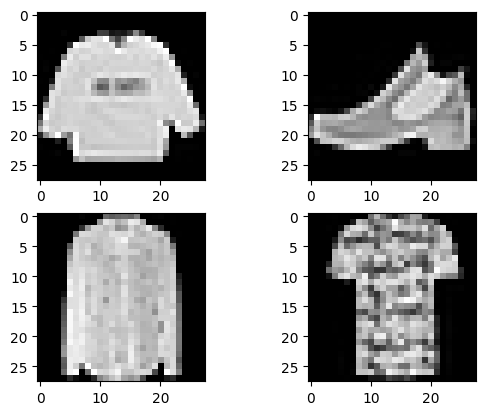

In [ ]:
fig,axe=plt.subplots(2,2)
idx = 0
for i in range(2):
    for j in range(2):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=1

In [ ]:
X_train =  X_train.astype('float32')

In [ ]:
X_train = X_train/255
X_train = X_train*2 - 1.

In [ ]:
print(X_train.max(),X_train.min())

nan nan


In [ ]:
generator = Sequential()
generator.add(Dense(512,input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784))
generator.add(Reshape([28,28,1]))

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

In [ ]:
discriminator = Sequential()
discriminator.add(Dense(1,input_shape=[28,28,1]))
discriminator.add(Flatten())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28, 28, 1)         2         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 128)              

In [ ]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
GAN.layers

In [ ]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         320656    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 242179    
                                                                 
Total params: 562835 (2.15 MB)
Trainable params: 318864 (1.22 MB)
Non-trainable params: 243971 (953.01 KB)
_________________________________________________________________


In [ ]:
epochs = 30
batch_size = 100
noise_shape=100

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Currently on Epoch 1
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
1/1 [==============================] - 0s 206ms/step


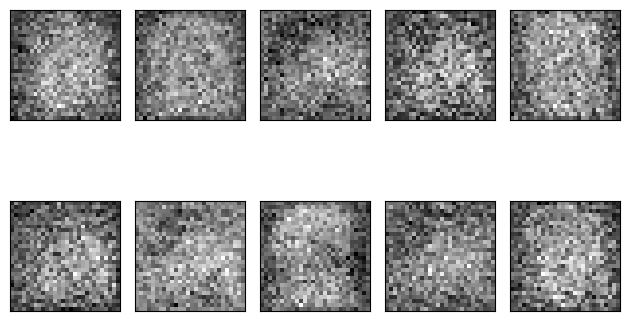

Currently on Epoch 2
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 3
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 4
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 5
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 6
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 7
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 8
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 9
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 10
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 11
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
1/1 [==============================] -

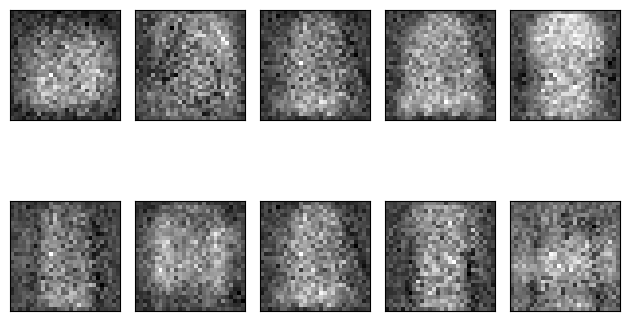

Currently on Epoch 12
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 13
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 14
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 15
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 16
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 17
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 18
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 19
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 20
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 21
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
1/1 [=========================

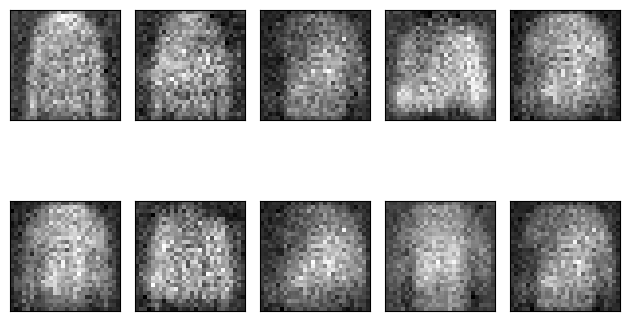

Currently on Epoch 22
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 23
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 24
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 25
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 26
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 27
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 28
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 29
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Currently on Epoch 30
	Currently on batch number 50 of 137
	Currently on batch number 100 of 137
Training is complete


In [ ]:
with tf.device('/gpu:0'):
 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")


    for i in range(X_train.shape[0]//batch_size):

        if (i+1)%50 == 0:
            print(f"\tCurrently on batch number {i+1} of {X_train.shape[0]//batch_size}")

        noise=np.random.normal(size=[batch_size,noise_shape])

        gen_image = generator.predict_on_batch(noise)

        train_dataset = X_train[i*batch_size:(i+1)*batch_size]

        #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)

        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)


        #training generator
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False

        d_g_loss_batch =GAN.train_on_batch(noise, train_label)




    #plotting generated images at the start and then after every 10 epoch
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()



print('Training is complete')

In [ ]:
noise=np.random.normal(size=[10,noise_shape])

gen_image = generator.predict(noise)

1/1 [==============================] - 0s 21ms/step


Text(0.5, 1.0, 'How the noise looks')

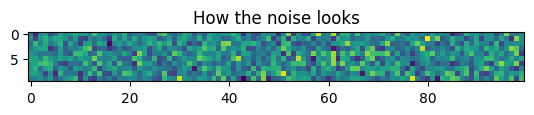

In [ ]:
plt.imshow(noise)
plt.title('How the noise looks')

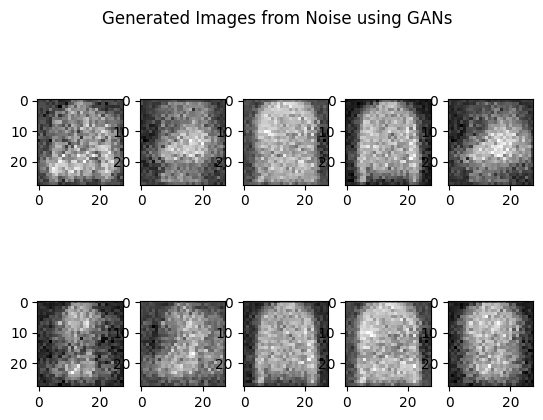

In [ ]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using GANs')
idx=0
for i in range(2):
    for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=1

GAN using Deep Convolutions

In [ ]:
generator = Sequential()
generator.add(Dense(7 * 7 * 128, input_shape=[100]))
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))

In [ ]:
generator.summary()

In [ ]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3),
                        input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

In [ ]:
discriminator.summary()

In [ ]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
GAN.layers

In [ ]:
GAN.summary()

In [ ]:
epochs = 150
batch_size = 100

In [ ]:
noise_shape=100

In [ ]:
with tf.device('/gpu:0'):
 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")


    for i in range(X_train.shape[0]//batch_size):

        if (i+1)%50 == 0:
            print(f"\tCurrently on batch number {i+1} of {X_train.shape[0]//batch_size}")

        noise=np.random.normal(size=[batch_size,noise_shape])

        gen_image = generator.predict_on_batch(noise)

        train_dataset = X_train[i*batch_size:(i+1)*batch_size]

        #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)

        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)


        #training generator
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False #while training the generator as combined model,discriminator training should be turned off

        d_g_loss_batch =GAN.train_on_batch(noise, train_label)




    #plotting generated images at the start and then after every 10 epoch
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()



print('Training is complete')

In [ ]:
noise=np.random.normal(loc=0, scale=1, size=(100,noise_shape))

gen_image = generator.predict(noise)

In [ ]:
fig,axe=plt.subplots(2,5)
fig.suptitle("Actual Images")
idx = 0
for i in range(2):
    for j in range(5):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=10

In [ ]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using DCGANs')
idx=0
for i in range(2):
     for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=3